# Avaliação Parcial 2 de Mineração de Dados

* **Aluna:** Bárbara Neves
* **Matrícula:** 388713

## Imports iniciais

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Leitura dos dados

In [2]:
df = pd.read_csv('breast_cancer_.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     561 non-null float64
1     565 non-null float64
2     558 non-null float64
3     564 non-null float64
4     564 non-null float64
5     560 non-null float64
6     561 non-null float64
7     566 non-null float64
8     558 non-null float64
9     566 non-null float64
10    564 non-null float64
11    559 non-null float64
12    564 non-null float64
13    560 non-null float64
14    563 non-null float64
15    566 non-null float64
16    559 non-null float64
17    566 non-null float64
18    560 non-null float64
19    566 non-null float64
20    559 non-null float64
21    566 non-null float64
22    564 non-null float64
23    563 non-null float64
24    560 non-null float64
25    564 non-null float64
26    563 non-null float64
27    562 non-null float64
28    563 non-null float64
29    565 non-null float64
30    561 non-null float64
y     569 non-null int64
dtypes: float64(31), int64(1)
mem

## Questão 1

### Tratando os atributos faltantes

Substituindo os atributos faltantes com a média dos valores das colunas.

In [4]:
df = df.fillna(df.mean())

In [5]:
# Verificando se ainda existem valores faltantes
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
y     0
dtype: int64

### Separando o conjunto de dados e treino

In [6]:
X = df.values[:, :-1]
y = df['y']

In [7]:
X.shape, y.shape

((569, 31), (569,))

In [8]:
from sklearn.model_selection import train_test_split

# Separando 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
X_train.shape, y_train.shape

((455, 31), (455,))

In [10]:
X_test.shape, y_test.shape

((114, 31), (114,))

### Fazendo os tópicos 3 e 4 da Questão 1 e a padronização dos atributos

Optei por usar o GridSearch porque ele consegue computar o cross-validation score durante o fit de um estimador e um parâmetro. Além disso, eu consigo mostrar todos os valores em uma tabela.

#### Criando os métodos

In [11]:
# BaggingClassifier com DecisionTreeClassifier, RandomForestClassifier e GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [12]:
bcdt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), oob_score=True, n_jobs=-1)
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

#### Criando os pipelines 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# BaggingClassifier com DecisionTreeClassifier
BCDT = Pipeline([('transformer', StandardScaler()),
                 ('estimator', bcdt)])
# RandomForestClassifier
RFC = Pipeline([('transformer', StandardScaler()),
                ('estimator', rfc)])
# GradientBoostingClassifier
GBC = Pipeline([('transformer', StandardScaler()),
                ('estimator', gbc)])

#### Criando os dicionários dos hiperparâmetros 


In [14]:
# BaggingClassifier com DecisionTreeClassifier
BCDT_param = {'estimator__n_estimators' : [50, 100, 200], 'estimator__base_estimator__max_depth' : [3, 5, 7]}
# RandomForestClassifier
RFC_param = {'estimator__n_estimators' : [50, 100, 200], 'estimator__max_depth' : [3, 5, 7]}
# Estimator learning_rate para o GradientBoosting
GBC_param = {'estimator__learning_rate' : [0.1, 0.05, 0.01], 'estimator__n_estimators' : [50, 100, 200], 
             'estimator__max_depth' : [3, 5, 7]}

#### Vetor com as métricas de avaliação

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, scorer

metrics = {'accuracy' : scorer.make_scorer(accuracy_score), 'precision' : scorer.make_scorer(precision_score), 
           'recall' : scorer.make_scorer(recall_score)}

#### Gerando o GridsSearch para cada método

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# BaggingClassifier com DecisionTreeClassifier
BCDT = GridSearchCV(BCDT, param_grid=BCDT_param, scoring=metrics, cv=3, iid=True, 
                    return_train_score=False, refit=False)
BCDT.fit(X_train, y_train)

# RandomForestClassifier
RFC = GridSearchCV(estimator=RFC, param_grid=RFC_param, scoring=metrics, cv=3, iid=True, 
                   return_train_score=False, refit=False)
RFC.fit(X_train, y_train)

# GradientBoostingClassifier
GBC = GridSearchCV(estimator=GBC, param_grid=GBC_param, scoring=metrics, cv=3, iid=True, 
                   return_train_score=False, refit=False)
GBC.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('estimator',
                                        GradientBoostingClassifier(criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nod

### Avaliando os métodos Ensemble

#### BaggingClassifier com DecisionTreeClassifier

In [18]:
df_BCDT = pd.DataFrame(BCDT.cv_results_)

features_BCDT = ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'param_estimator__n_estimators', 
                 'param_estimator__base_estimator__max_depth']

df_BCDT[features_BCDT]

,mean_test_accuracy,mean_test_precision,mean_test_recall,param_estimator__n_estimators,param_estimator__base_estimator__max_depth
0,0.995604,0.993076,1.0,50,3
1,0.995604,0.993076,1.0,100,3
2,0.995604,0.993076,1.0,200,3
3,0.995604,0.993076,1.0,50,5
4,0.995604,0.993076,1.0,100,5
5,0.995604,0.993076,1.0,200,5
6,0.995604,0.993076,1.0,50,7
7,0.995604,0.993076,1.0,100,7
8,0.995604,0.993076,1.0,200,7


In [19]:
# Observando os 5 maiores valores para a acurácia
df_BCDT_new = df_BCDT.loc[df_BCDT['mean_test_accuracy'] > 0.99].nlargest(5, 'mean_test_accuracy')
df_BCDT_new['mean_test_accuracy']

0    0.995604
1    0.995604
2    0.995604
3    0.995604
4    0.995604
Name: mean_test_accuracy, dtype: float64

Para o **BaggingClassifier com DecisionTreeClassifier** todos os valores para a acurácia foram os mesmos, e quase todos os valores para as métricas precision e recall também foram bastante parecidos. 

#### RandomForestClassifier

In [20]:
df_RFC = pd.DataFrame(RFC.cv_results_)

features_RFC = ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'param_estimator__n_estimators', 
                'param_estimator__max_depth']

df_RFC[features_RFC]

,mean_test_accuracy,mean_test_precision,mean_test_recall,param_estimator__n_estimators,param_estimator__max_depth
0,0.984615,0.976215,1.000000,50,3
1,0.982418,0.976110,0.996507,100,3
2,0.978022,0.972607,0.993013,200,3
3,0.995604,0.993076,1.000000,50,5
4,0.993407,0.989691,1.000000,100,5
5,0.993407,0.989691,1.000000,200,5
6,0.995604,0.993076,1.000000,50,7
7,0.995604,0.993076,1.000000,100,7
8,0.993407,0.989691,1.000000,200,7


In [21]:
# Observando os 5 maiores valores para a acurácia
df_RFC_new = df_RFC.loc[df_RFC['mean_test_accuracy'] > 0.99].nlargest(5, 'mean_test_accuracy')
df_RFC_new['mean_test_accuracy']

3    0.995604
6    0.995604
7    0.995604
4    0.993407
5    0.993407
Name: mean_test_accuracy, dtype: float64

Para o **RandomForestClassifier**, os melhores resultados obtidos estão nas linhas 6 e 7.

#### GradientBoostingClassifier


In [22]:
df_GBC = pd.DataFrame(GBC.cv_results_)

features_GBC = ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 
                'param_estimator__learning_rate', 'param_estimator__n_estimators', 'param_estimator__max_depth']

df_GBC[features_GBC]

,mean_test_accuracy,mean_test_precision,mean_test_recall,param_estimator__learning_rate,param_estimator__n_estimators,param_estimator__max_depth
0,0.993407,0.993040,0.996497,0.1,50,3
1,0.993407,0.993040,0.996497,0.1,100,3
2,0.993407,0.993040,0.996497,0.1,200,3
3,0.991209,0.989583,0.996497,0.1,50,5
4,0.991209,0.989583,0.996497,0.1,100,5
5,0.991209,0.989583,0.996497,0.1,200,5
6,0.991209,0.989583,0.996497,0.1,50,7
7,0.991209,0.989583,0.996497,0.1,100,7
8,0.991209,0.989583,0.996497,0.1,200,7
9,0.993407,0.993040,0.996497,0.05,50,3


In [23]:
# Observando os 5 maiores valores para a acurácia
df_GBC_new = df_GBC.loc[df_GBC['mean_test_accuracy'] > 0.99].nlargest(5, 'mean_test_accuracy')
df_GBC_new['mean_test_accuracy']

0     0.993407
1     0.993407
2     0.993407
9     0.993407
10    0.993407
Name: mean_test_accuracy, dtype: float64

### Treinando o conjunto de treino e teste com o melhor método

#### Padronizando os resultados

In [24]:
sc = StandardScaler().fit(X_train)

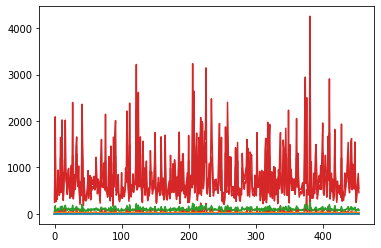

In [25]:
plt.plot(X_train);

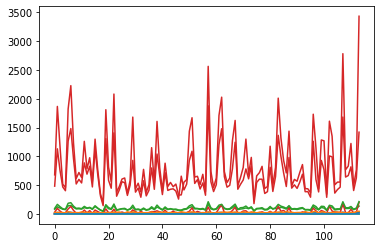

In [26]:
plt.plot(X_test);

In [27]:
X_train_scaler = sc.transform(X_train)
X_test_scaler = sc.transform(X_test)

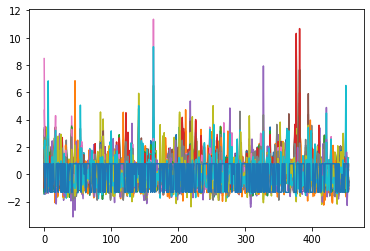

In [28]:
plt.plot(X_train_scaler);

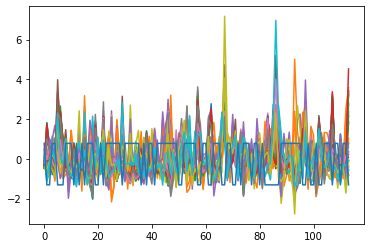

In [29]:
plt.plot(X_test_scaler);

#### Treinando o modelo 

O melhor modelo, seguindo a análise feita anteriormente, apesar de todos os modelos possuírem bons resultados, o que apresenta melhores valores para a acurácia, foi o BaggingClassifier com DecisionTreeClassifier.

In [30]:
bcdt.fit(X_train_scaler, y_train)
y_pred = bcdt.predict(X_test_scaler)

/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [31]:
# Avaliação pelas métricas
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(1.0, 1.0, 1.0)

## Questão 2

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
# Criação da rede
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


* **Explicação da arquitetura da rede neural MLP:**


1. Uma rede MLP é formada por uma camada de entrada que contém um ou mais neurônios artificiais, com ou sem bias, conectada com outras camadas consecutivas, e uma camada de saída.
2. A arquitetura criada contém duas camadas: a primeira se trata da camada de entrada que contém 32 unidades, como o também o tamanho dos dados de treino. Também contém uma função de ativação, que eu sei que ela é bastante utilizada para a camada de entrada desse tipo de rede. A última camada se trata de uma camada de saída, com apenas um nó, e a função de ativação sigmoid, pois assim a rede apenas aprende a predizer valores de 0 a 1.

In [34]:
# Printando a acurácia dos dados durante a evolução das épocas
# Validation_split separa os 10% dos dados para a validação
historic_epochs = model.fit(X_train, y_train, epochs=100, validation_split=0.10);

Train on 409 samples, validate on 46 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
409/409 [==============================] - 0s 369us/sample - loss: 5.7434 - acc: 0.4279 - val_loss: 3.6260 - val_acc: 0.3261
Epoch 2/100
409/409 [==============================] - 0s 28us/sample - loss: 4.6207 - acc: 0.4230 - val_loss: 2.7821 - val_acc: 0.6522
Epoch 3/100
409/409 [==============================] - 0s 28us/sample - loss: 3.1540 - acc: 0.5012 - val_loss: 1.6248 - val_acc: 0.4565
Epoch 4/100
409/409 [==============================] - 0s 28us/sample - loss: 2.2543 - acc: 0.5281 - val_loss: 2.0668 - val_acc: 0.4130
Epoch 5/100
409/409 [==============================] - 0s 34us/sample - loss: 1.2861 - acc: 0.6944 - val_loss: 0.9692 - val_acc: 0.7609
Epoch 6/100
409/409 [==============================] - 0s 31us/sample - loss: 1.0840 - acc: 0.7286 - val_loss: 0.5307 - val_acc: 0.8261
Epoch 7/100
409/409 [==============================] - 0s 29us/sample - loss: 0.8322 - acc

409/409 [==============================] - 0s 47us/sample - loss: 0.4723 - acc: 0.8606 - val_loss: 0.2554 - val_acc: 0.9130
Epoch 59/100
409/409 [==============================] - 0s 36us/sample - loss: 0.3995 - acc: 0.8875 - val_loss: 0.2726 - val_acc: 0.8913
Epoch 60/100
409/409 [==============================] - 0s 32us/sample - loss: 0.2144 - acc: 0.9291 - val_loss: 0.4178 - val_acc: 0.8696
Epoch 61/100
409/409 [==============================] - 0s 33us/sample - loss: 0.3651 - acc: 0.8924 - val_loss: 0.7252 - val_acc: 0.7391
Epoch 62/100
409/409 [==============================] - 0s 36us/sample - loss: 0.3210 - acc: 0.9095 - val_loss: 0.2316 - val_acc: 0.9130
Epoch 63/100
409/409 [==============================] - 0s 38us/sample - loss: 0.5128 - acc: 0.8924 - val_loss: 0.2757 - val_acc: 0.8913
Epoch 64/100
409/409 [==============================] - 0s 41us/sample - loss: 0.2041 - acc: 0.9218 - val_loss: 0.7310 - val_acc: 0.8261
Epoch 65/100
409/409 [==============================] 

#### Gráfico com a acurácia do modelo para os dados de teste

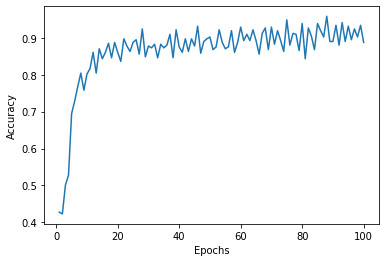

In [35]:
acc = historic_epochs.history['acc']

plt.plot(range(1, len(acc) + 1), acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### Verificando a época que obteve o melhor desempenho

In [36]:
print("Época que obteve o melhor desempenho: ")

df_history = pd.DataFrame(historic_epochs.history)

df_history_values = df_history.nlargest(1, ['acc'])

df_history_values

Época que obteve o melhor desempenho: 


,loss,acc,val_loss,val_acc
87,0.096364,0.958435,0.255458,0.956522


In [45]:
df_history_values.

array([[0.09636374, 0.95843524, 0.25545814, 0.95652175]])

In [38]:
# Retreinando o modelo, considerando a melhor época
best_epoch = df_history_values['']

model.fit(X_train, y_train, epochs=1, initial_epoch=96);

In [39]:
model.evaluate(X_test, y_test)

114/114 [==============================] - 0s 92us/sample - loss: 0.2426 - acc: 0.9035


[0.24263992276565546, 0.9035088]

Retreinando o modelo com os dados de treino+validação, considerando a melhor época, ao avaliar os dados de teste, a acurácia obtida foi 0.99122804.